In [23]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
current_path = os.getcwd()
base_path = os.path.join(*current_path.split(os.sep)[:current_path.split(os.sep).index("torch-deep-retina") + 1])
base_path

'Users/giovannigatti/Desktop/MSc AI/neuro/torch-deep-retina'

In [17]:
corr_df = pd.read_csv(f'/{os.path.join(base_path, "csvs", "interneuron_cors.csv")}', sep='!')
corr_df['layer'] = corr_df['layer'].replace({'sequential.0': 'layer1', 'sequential.4': 'layer2'})
corr_df

,cell_file,cell_idx,stim_type,cell_type,layer,chan,row,col,cor,xshift,yshift,tshift,abs_cor,save_folder
0,amacrines_late_2012.h5,3,boxes,amacrine,layer1,6,17,27,0.771693,0,0,1,0.771693,15-11-21b_naturalscene.pt
1,bipolars_late_2012.h5,0,boxes,bipolar,layer2,6,13,23,0.756909,0,0,1,0.756909,15-11-21b_naturalscene.pt
2,bipolars_late_2012.h5,3,boxes,bipolar,layer2,6,12,20,0.710521,0,0,1,0.710521,15-11-21b_naturalscene.pt
3,amacrines_late_2012.h5,6,boxes,amacrine,layer2,5,12,21,0.705303,0,0,1,0.705303,15-11-21b_naturalscene.pt
4,amacrines_late_2012.h5,8,boxes,amacrine,layer2,6,12,22,0.705299,0,0,1,0.705299,15-11-21b_naturalscene.pt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,amacrines_early_2012.h5,3,boxes,amacrine,layer1,2,17,20,0.480591,0,0,5,0.480591,15-10-07_naturalscene.pt
194,bipolars_late_2012.h5,1,boxes,bipolar,layer1,5,16,19,0.470736,0,0,5,0.470736,15-10-07_naturalscene.pt
195,amacrines_late_2012.h5,19,boxes,amacrine,layer1,7,16,17,0.457620,0,0,5,0.457620,15-10-07_naturalscene.pt
196,bipolars_early_2012.h5,1,boxes,bipolar,layer1,7,16,21,0.439995,0,0,5,0.439995,15-10-07_naturalscene.pt


In [18]:
amacrine_df = corr_df[corr_df['cell_type'] == 'amacrine']
amacrine_df.head()

,cell_file,cell_idx,stim_type,cell_type,layer,chan,row,col,cor,xshift,yshift,tshift,abs_cor,save_folder
0,amacrines_late_2012.h5,3,boxes,amacrine,layer1,6,17,27,0.771693,0,0,1,0.771693,15-11-21b_naturalscene.pt
3,amacrines_late_2012.h5,6,boxes,amacrine,layer2,5,12,21,0.705303,0,0,1,0.705303,15-11-21b_naturalscene.pt
4,amacrines_late_2012.h5,8,boxes,amacrine,layer2,6,12,22,0.705299,0,0,1,0.705299,15-11-21b_naturalscene.pt
5,amacrines_late_2012.h5,11,boxes,amacrine,layer2,6,15,21,0.684077,0,0,1,0.684077,15-11-21b_naturalscene.pt
6,amacrines_late_2012.h5,4,boxes,amacrine,layer1,4,20,30,0.683829,0,0,1,0.683829,15-11-21b_naturalscene.pt


In [19]:
amacrine_layer_cnts = amacrine_df.groupby(['save_folder', 'layer']).size()
amacrine_layer_cnts = amacrine_layer_cnts.reset_index(name='count')
non_skip_amacrine = amacrine_layer_cnts[~amacrine_layer_cnts['save_folder'].str.contains("skip_")]
skip_amacrine = amacrine_layer_cnts[amacrine_layer_cnts['save_folder'].str.contains("skip_")]

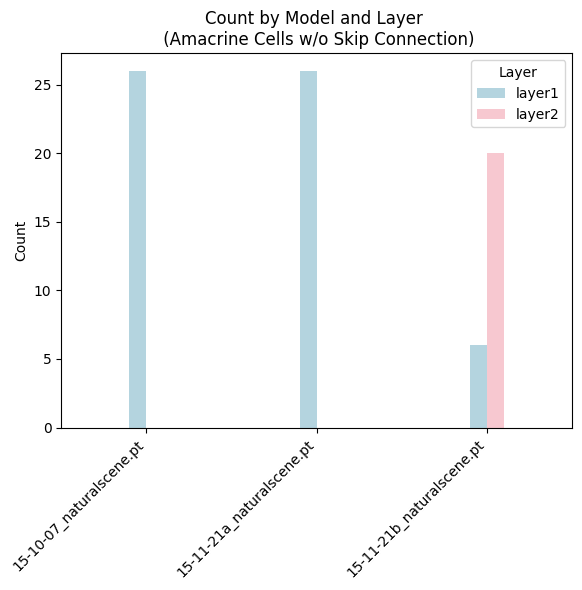

In [31]:
plt.figure(figsize=(6, 6))  
sns.barplot(
    data=non_skip_amacrine, 
    x='save_folder', 
    y='count', 
    hue='layer', 
    palette=['lightblue', 'pink'], 
    width=0.2  
)

# Customizing the plot
plt.title('Count by Model and Layer \n (Amacrine Cells w/o Skip Connection)')
plt.xlabel("")  # Remove x-axis label
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(np.arange(0, non_skip_amacrine['count'].max() + 1, 5))  # Set y-axis ticks to integer values only
plt.legend(title='Layer')
plt.tight_layout()

plt.show()

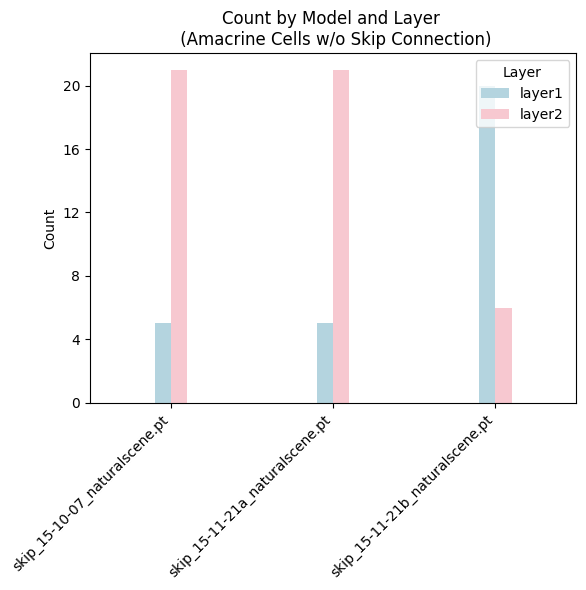

In [32]:
plt.figure(figsize=(6, 6))  
sns.barplot(
    data=skip_amacrine, 
    x='save_folder', 
    y='count', 
    hue='layer', 
    palette=['lightblue', 'pink'], 
    width=0.2  
)

# Customizing the plot
plt.title('Count by Model and Layer \n (Amacrine Cells w/o Skip Connection)')
plt.xlabel("")  # Remove x-axis label
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(np.arange(0, skip_amacrine['count'].max() + 1, 4))  # Set y-axis ticks to integer values only
plt.legend(title='Layer')
plt.tight_layout()

plt.show()

In [20]:
bipolar_df = corr_df[corr_df['cell_type'] == 'bipolar']
bipolar_df.head()

,cell_file,cell_idx,stim_type,cell_type,layer,chan,row,col,cor,xshift,yshift,tshift,abs_cor,save_folder
1,bipolars_late_2012.h5,0,boxes,bipolar,layer2,6,13,23,0.756909,0,0,1,0.756909,15-11-21b_naturalscene.pt
2,bipolars_late_2012.h5,3,boxes,bipolar,layer2,6,12,20,0.710521,0,0,1,0.710521,15-11-21b_naturalscene.pt
7,bipolars_late_2012.h5,2,boxes,bipolar,layer2,6,14,23,0.662120,0,0,1,0.662120,15-11-21b_naturalscene.pt
10,bipolars_early_2012.h5,2,boxes,bipolar,layer2,0,13,24,0.646632,0,0,1,0.646632,15-11-21b_naturalscene.pt
19,bipolars_early_2012.h5,0,boxes,bipolar,layer2,0,13,25,0.614544,0,0,1,0.614544,15-11-21b_naturalscene.pt


In [21]:
bipolar_layer_cnts = bipolar_df.groupby(['save_folder', 'layer']).size()
bipolar_layer_cnts = bipolar_layer_cnts.reset_index(name='count')
non_skip_bipolar = bipolar_layer_cnts[~bipolar_layer_cnts['save_folder'].str.contains("skip_")]
skip_bipolar = bipolar_layer_cnts[bipolar_layer_cnts['save_folder'].str.contains("skip_")]

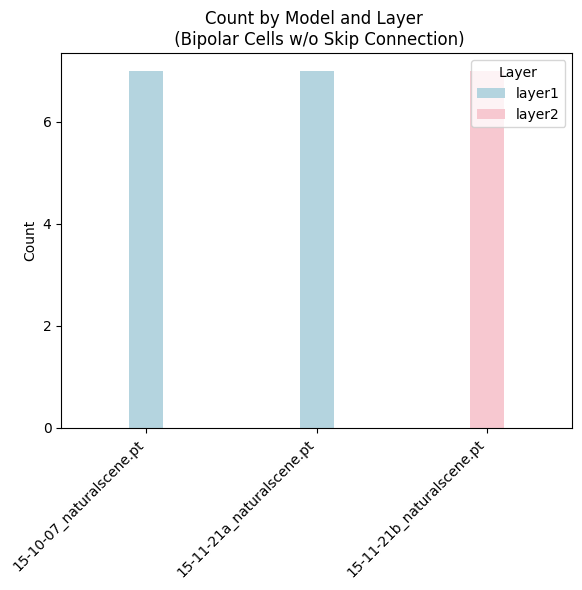

In [33]:
plt.figure(figsize=(6, 6))  
sns.barplot(
    data=non_skip_bipolar, 
    x='save_folder', 
    y='count', 
    hue='layer', 
    palette=['lightblue', 'pink'], 
    width=0.2  
)

# Customizing the plot
plt.title('Count by Model and Layer \n (Bipolar Cells w/o Skip Connection)')
plt.xlabel("")  # Remove x-axis label
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(np.arange(0, non_skip_bipolar['count'].max() + 1, 2))  # Set y-axis ticks to integer values only
plt.legend(title='Layer')
plt.tight_layout()

plt.show()

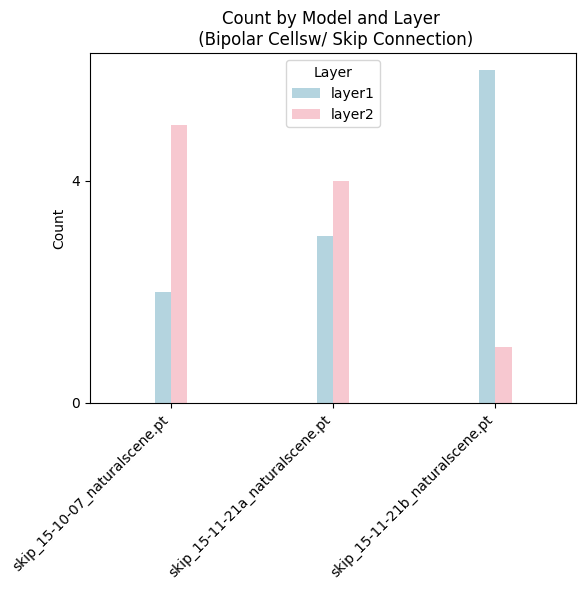

In [34]:
plt.figure(figsize=(6, 6))  
sns.barplot(
    data=skip_bipolar, 
    x='save_folder', 
    y='count', 
    hue='layer', 
    palette=['lightblue', 'pink'], 
    width=0.2  
)

# Customizing the plot
plt.title('Count by Model and Layer \n (Bipolar Cellsw/ Skip Connection)')
plt.xlabel("")  # Remove x-axis label
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(np.arange(0, skip_bipolar['count'].max() + 1, 4))  # Set y-axis ticks to integer values only
plt.legend(title='Layer')
plt.tight_layout()

plt.show()